UPLOAD FILES

LOAD DATA

In [2]:
import pandas as pd
import numpy as np
from pandas import Timestamp
orders = pd.read_csv("orders.csv")
inventory = pd.read_csv("inventory.csv")

CLEAN ORDERS

In [3]:
orders['delivery_date'] = pd.to_datetime(orders['delivery_date'], errors='coerce')
orders.dropna(subset=['delivery_date'], inplace=True)
orders['delay_days'] = (Timestamp.today() - orders['delivery_date']).dt.days
orders['is_delayed'] = np.where(orders['delay_days'] > 0, 1, 0)
print("cleaned orders:\n", orders[['order_id','supplier_id','delivery_date','delay_days','is_delayed']])

cleaned orders:
     order_id supplier_id delivery_date  delay_days  is_delayed
0       1001        S001    2024-07-03         392           1
1       1002        S002    2024-07-08         387           1
2       1003        S001    2024-07-06         389           1
3       1004        S003    2024-07-10         385           1
4       1005        S002    2024-07-09         386           1
5       1006        S003    2024-07-12         383           1
6       1007        S001    2024-07-14         381           1
7       1008        S002    2024-07-20         375           1
8       1009        S003    2024-07-15         380           1
9       1010        S001    2024-07-17         378           1
10      1011        S002    2024-07-20         375           1
11      1012        S003    2024-07-18         377           1
12      1013        S001    2024-07-24         371           1
13      1014        S002    2024-07-21         374           1
14      1015        S003    2024-07-25

ANALYZE INVENTORY

In [4]:
inventory['need_restock'] = np.where(inventory['stock_level'] < inventory['reorder_level'], 1, 0)
print("\nrestock report:\n", inventory[['item_id','item_name','stock_level','reorder_level','need_restock']])


restock report:
    item_id               item_name  stock_level  reorder_level  need_restock
0     I001              Steel Rods         35.0           40.0             1
1     I002            Copper Wires         50.0           30.0             0
2     I003          Plastic Sheets         20.0           25.0             1
3     I004          Nuts and Bolts         15.0           20.0             1
4     I005         Aluminum Panels         60.0           45.0             0
5     I006               Batteries         10.0           15.0             1
6     I007            LED Displays         25.0           30.0             1
7     I008                  Screws         40.0           35.0             0
8     I009         Packaging Boxes         22.0           30.0             1
9     I010                  Cables         33.0           20.0             0
10    I011              Fuse Units         14.0           20.0             1
11    I012                Switches         28.0           

EXPORT

In [5]:
orders.to_csv("cleaned_orders.csv", index=False)
inventory.to_csv("restock_report.csv", index=False)

Items Need Restocking

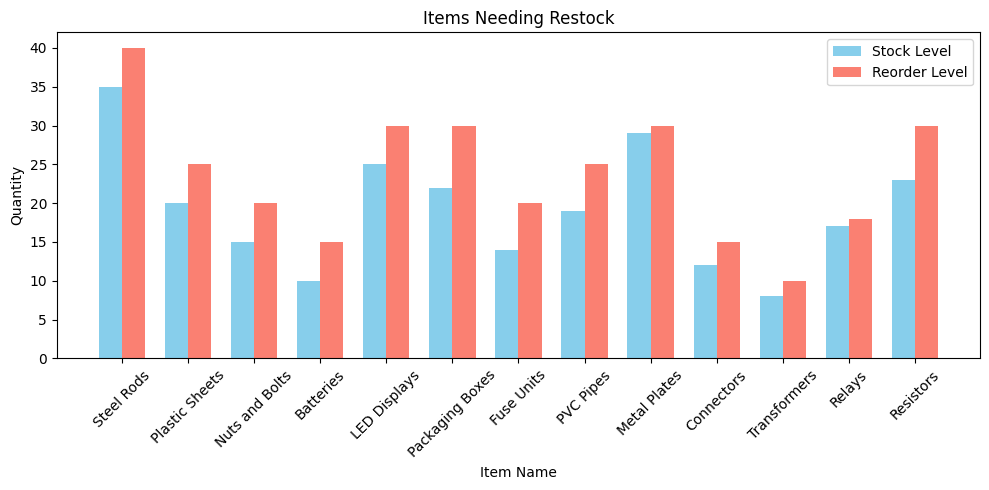

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
restock_items = inventory[inventory['need_restock'] == 1]

plt.figure(figsize=(10,5))
bar_width = 0.35
index = range(len(restock_items))

plt.bar(index, restock_items['stock_level'], bar_width, label='Stock Level', color='skyblue')
plt.bar([i + bar_width for i in index], restock_items['reorder_level'], bar_width, label='Reorder Level', color='salmon')
plt.xticks([i + bar_width / 2 for i in index], restock_items['item_name'], rotation=45)
plt.title('Items Needing Restock')
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()